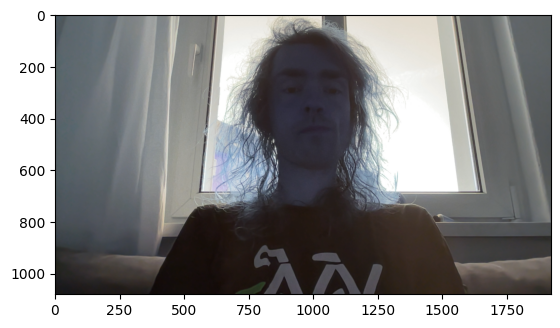

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 


# Open the default camera
cam = cv2.VideoCapture(0)

# Get the default frame width and height
frame_width = int(cam.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cam.get(cv2.CAP_PROP_FRAME_HEIGHT))

for i in range(20):
    ret, frame = cam.read()

plt.imshow(frame)
plt.show()

# Release the capture and writer objects
cam.release()


In [9]:
import uc2rest
import numpy as np
import time

port = "unknown"
ESP32 = uc2rest.UC2Client(serialport=port, baudrate=115200, DEBUG=True)


[OpenDevice]: Port not found
[checkFirmware]: b'++\n'
{"identifier_name":"UC2_Feather","identifier_id":"V2.0","identifier_date":"May  1 2025 07:19:27","identifier_author":"BD","IDENTIFIER_NAME":"uc2-esp","configIsSet":0,"pindef":"UC2","success":1,"qid":0}
--
Using API version 2
{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}


Exception in thread Thread-17 (_process_commands):
Traceback (most recent call last):
  File "/Users/bene/mambaforge/envs/imswitch311/lib/python3.11/threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "/Users/bene/mambaforge/envs/imswitch311/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "/Users/bene/mambaforge/envs/imswitch311/lib/python3.11/threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/bene/Dropbox/Dokumente/Promotion/PROJECTS/UC2-REST/uc2rest/mserial.py", line 356, in _process_commands
    self._logger.debug("Error - last command did not match the firmware: "+str(self.commands[currentIdentifier]))
                                                                               ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^
KeyError: None


[ProcessLines]:{"status":"error","info":"Unknown task"}


In [23]:
#%%
import uc2rest
import numpy as np
import time

port = "unknown"
port = "/dev/cu.usbmodem101"
ESP32 = uc2rest.UC2Client(serialport=port, baudrate=115200, DEBUG=True, skipFirmwareCheck=True)

''' TEST LED '''

# Create LedMatrix object, pass a reference to your “parent” that has post_json()
my_led_matrix = ESP32.led



for i in range(1):
    # Turn off all LEDs
    my_led_matrix.send_LEDMatrix_off()
    time.sleep(0.1)
    # Fill entire matrix with red
    my_led_matrix.send_LEDMatrix_full((255,0,0), getReturn=False)
    time.sleep(0.1)



# Open the default camera
cam = cv2.VideoCapture(0)

# Get the default frame width and height
frame_width = int(cam.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cam.get(cv2.CAP_PROP_FRAME_HEIGHT))

# warmup camera
for i in range(20):
    ret, frame = cam.read()



mFrames = []
# Light only left half in bright white
mDirections = ["left", "right", "top", "bottom"]
for iDirection in mDirections:
    my_led_matrix.send_LEDMatrix_halves(region=iDirection, intensity=(255,255,255), getReturn=False)
    time.sleep(0.1)
    mFrames.append(cam.read()[-1])

# Draw a ring of radius 3 in purple
my_led_matrix.send_LEDMatrix_rings(radius=3, intensity=(128,0,128))

# Draw a filled circle of radius 5 in green
my_led_matrix.send_LEDMatrix_circles(radius=3, intensity=(0,255,0))




for iLED in range(5):
    # timeout = 0 means no timeout => mResult will be rubish!
    mResult = ESP32.led.send_LEDMatrix_single(indexled=iLED, intensity=(255, 255, 255), getReturn=0, timeout=0.1)
    mResult = ESP32.led.send_LEDMatrix_single(indexled=iLED, intensity=(0, 0, 0),  getReturn=0, timeout=0.1)

# display random pattern
for i in range(5):
    led_pattern = np.random.randint(0,55, (25,3))
    mResult = ESP32.led.send_LEDMatrix_array(led_pattern=led_pattern,getReturn=0,timeout=0)



# {"task":"/ledarr_act", "led":{"LEDArrMode":1, "led_array":[{"id":0, "r":255, "g":255, "b":255}]}}
mResult = ESP32.led.send_LEDMatrix_full(intensity=(255, 255, 255))
time.sleep(.1)
mResult = ESP32.led.send_LEDMatrix_full(intensity=(0, 0, 0), getReturn=False)


Using API version 2
{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}
[SendingCommands]:{"task": "/ledarr_act", "qid": 1, "led": {"action": "off"}}

[SendingCommands]:{"task": "/ledarr_act", "qid": 2, "led": {"action": "fill", "LEDArrMode": 1, "r": 255, "g": 0, "b": 0}}

[SendingCommands]:{"task": "/ledarr_act", "qid": 3, "led": {"action": "halves", "region": "left", "r": 255, "g": 255, "b": 255}}

[SendingCommands]:{"task": "/ledarr_act", "qid": 4, "led": {"action": "halves", "region": "right", "r": 255, "g": 255, "b": 255}}

[SendingCommands]:{"task": "/ledarr_act", "qid": 5, "led": {"action": "halves", "region": "top", "r": 255, "g": 255, "b": 255}}

[SendingCommands]:{"task": "/ledarr_act", "qid": 6, "led": {"action": "halves", "region": "bottom", "r": 255, "g": 255, "b": 255}}

[SendingCommands]:{"task": "/ledarr_act", "qid": 7, "led": {"action": "rings", "radius": 3, "r": 128, "g": 0, "b": 128}}

[ProcessLines]:++
[ProcessLines]:{"qid":7,"success":1}
[Process

In [22]:
import sys
sys.executable 


'/Users/bene/mambaforge/envs/imswitch311/bin/python3.11'